# Pronostico de aperturas de muestreo en Sondeos electricos Verticales

queremos comprobar si es posible generar predicciones de aperturas que nos permitas identificar de mejor manera los limites o contrastes de unidades geoelectricas reistivas, y compararlo con resultados conta el metodo de muestreo comunmente empleado.

## paso cero

integracion de datos iniciales y librerias que se emplearan

## paso 1

Para ello emplearemso datos conocidos de resultados de muestreos integrando los espesores y resitividades de las unidades geolectricas del medio, identificamos sus estadisticos basicos y la distribucion a la que mejor se ajustan

## paso 2

Se procede a generar variaciones de modelos tomando como base la distribucion de ajuste de cada sitio de estudio, apartir de la cual se generaran variacines de espesores manteniendo la relacion de la distribucion a la cual se ajustan los valores de los modelos de c ada sitio, asi como a su desviacion estandar.

## paso 3 

Una ves generadas las variaciones de modelos se generan registros independientes para cada sitio, de manera que obtengamos valores de resitividad mediante PyGIMLI para cada sitio,

## paso 4

Con este conjunto de datos se procede a realizar el entrenamiento y comprobacion de cada sitio empleando los valores de adquisicion reales

## paso 5

se realiza estaddsitico comparativo de los resultados mas destacados


### Paso Cero

integramos las librerias que emplearemos y los datos apartir de los cuales se desarrolla el proyecto

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pygimli as pg # Muy importante tener PyGIMLi instalado
from pygimli.physics import VESManager
from pygimli.physics.ves import VESManager  

import scipy.stats as stats
from scipy.stats import weibull_min

from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score



In [79]:
# primer conjunto de datos empleado, 
#df = pd.read_csv("DATOS/modelos_sinteticos-SEV.csv")

#datos corregidos
df = pd.read_csv("DATOS/Modelos-caracterizados-completo.csv")

In [80]:
print(df)

          Modelo  Sitio  Espesor_1  Espesor_2  Espesor_3  Resistividad_1  \
0     S1-LN-EBSA      1       6.10      60.70     131.30          150.00   
1     S2-LN-EBSA      1       6.40      78.47     113.53          196.01   
2     S3-LN-EBSA      1       6.00      70.00     122.00          437.20   
3      S1-AMEBSA      2       2.40       8.50      45.50           56.60   
4      S2-AMEBSA      2       1.30       4.50      66.00           56.00   
5      S3-AMEBSA      2       3.00      23.00      32.00           95.00   
6      S4-AMEBSA      2       3.00       9.00      63.00            4.00   
7      S5-AMEBSA      2       3.50       9.00      41.00           48.00   
8      S1-BMEBSA      3       3.00      27.00        NaN          125.00   
9      S2-BMEBSA      3       4.00      26.00        NaN            2.20   
10    S1-MFA-VER      4       2.90      19.90      37.20           86.70   
11    S2-MFA-VER      4       1.70      15.70      42.60           21.80   
12    S3-MFA

In [81]:
df.describe()

,Sitio,Espesor_1,Espesor_2,Espesor_3,Resistividad_1,Resistividad_2,Resistividad_3,Resistividad_4,AB2_1,AB2_2,...,AB2_21,AB2_22,AB2_23,AB2_24,AB2_25,AB2_26,AB2_27,AB2_28,AB2_29,AB2_30
count,25.000000,25.000000,25.000000,23.000000,25.000000,25.000000,25.00000,23.000000,25.000000,25.000000,...,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,4.440000,5.190400,22.446800,67.236087,183.283200,711.214400,1841.18240,2222.542261,1.120000,3.000000,...,79.240000,87.04000,94.960000,102.800000,108.960000,115.680000,122.920000,130.640000,138.960000,149.400000
std,2.467793,7.579532,19.795223,45.085015,293.547888,1033.131992,2425.93679,3046.763130,0.331662,2.327373,...,47.625518,53.29828,61.397258,67.619031,71.056011,76.897508,81.246497,86.544247,92.899803,102.919062
min,1.000000,0.700000,4.500000,20.000000,1.000000,1.000000,32.50000,39.000000,1.000000,2.000000,...,30.000000,32.00000,34.000000,38.000000,40.000000,42.000000,44.000000,48.000000,49.000000,50.000000
25%,2.000000,2.360000,9.000000,41.800000,21.800000,45.000000,85.00000,111.000000,1.000000,2.000000,...,54.000000,58.00000,60.000000,64.000000,68.000000,70.000000,75.000000,80.000000,85.000000,90.000000
50%,4.000000,3.000000,15.800000,52.700000,56.600000,100.000000,1271.40000,1216.440000,1.000000,2.000000,...,55.000000,60.00000,65.000000,70.000000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000
75%,7.000000,5.600000,26.000000,73.000000,196.010000,1300.000000,2300.00000,2940.000000,1.000000,2.000000,...,65.000000,70.00000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000,110.000000,120.000000
max,8.000000,40.000000,78.470000,204.000000,1300.000000,3350.000000,11000.00000,13200.000000,2.000000,10.000000,...,200.000000,210.00000,230.000000,260.000000,280.000000,300.000000,310.000000,330.000000,360.000000,400.000000


### Paso 1

se generan los estadisticos basicos y la distribucion que mjor se ajusta a cada sitio

   Sitio Mejor_Distribucion  \
0      1               norm   
1      2        weibull_min   
2      3               norm   
3      4               norm   
4      5        weibull_min   
5      6        weibull_min   
6      7              gamma   
7      8        weibull_min   

                                          Parametros   KS_stat   p_value  
0            (66.05555555555556, 47.841084182974676)  0.227126  0.662627  
1  (0.30435951866513944, 1.2999999999999998, 25.3...  0.264685  0.203960  
2                         (15.0, 11.510864433221338)  0.330368  0.672065  
3                         (20.0, 18.450956012569588)  0.226881  0.663870  
4  (0.5002639226424053, 0.6999999999999998, 10.30...  0.229222  0.651996  
5  (0.6960698150189448, 2.3599999999999994, 27.56...  0.213594  0.897464  
6  (0.7065440219344926, 2.999999999999999, 54.370...  0.184266  0.868458  
7  (0.5799705282246079, 3.4999999999999996, 14.46...  0.120975  0.985680  


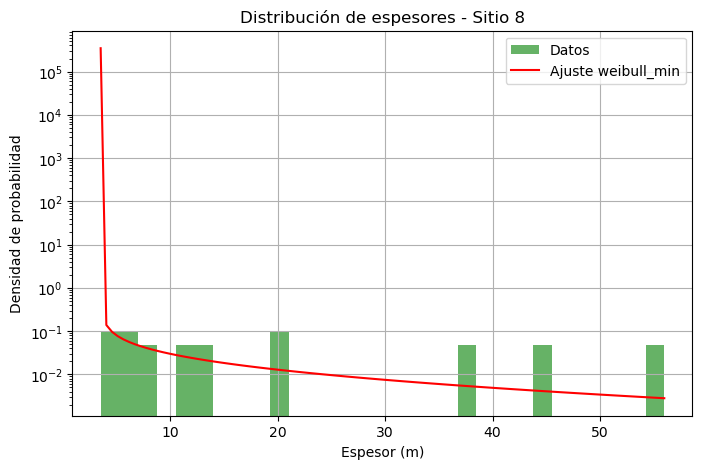

In [82]:


columnas_espesores = ["Espesor_1", "Espesor_2", "Espesor_3"]
distribuciones = [stats.norm, stats.lognorm, stats.gamma, stats.expon, stats.weibull_min]
resultados_por_sitio = []

for sitio, datos in df.groupby("Sitio"):
    todos_los_espesores = pd.concat([datos[col] for col in columnas_espesores], ignore_index=True).dropna()
    
    resultados = {}
    for dist in distribuciones:
        params = dist.fit(todos_los_espesores)
        D, p_value = stats.kstest(todos_los_espesores, dist.cdf, args=params)
        resultados[dist.name] = {'params': params, 'KS_stat': D, 'p_value': p_value}
    
    mejor_ajuste = sorted(resultados.items(), key=lambda x: x[1]['KS_stat'])[0]
    
    resultados_por_sitio.append({
        "Sitio": sitio,
        "Mejor_Distribucion": mejor_ajuste[0],  # Corrected index
        "Parametros": mejor_ajuste[1]['params'],
        "KS_stat": mejor_ajuste[1]['KS_stat'],
        "p_value": mejor_ajuste[1]['p_value']
    })

# Convertir resultados en un DataFrame
resultados_df = pd.DataFrame(resultados_por_sitio)
print(resultados_df)

# Graficar la mejor distribución para un sitio de ejemplo
sitio_ejemplo = df["Sitio"].unique()[7]
datos_ejemplo = df[df["Sitio"] == sitio_ejemplo][columnas_espesores].values.flatten()
datos_ejemplo = datos_ejemplo[~np.isnan(datos_ejemplo)]

mejor_dist = resultados_df[resultados_df["Sitio"] == sitio_ejemplo]["Mejor_Distribucion"].values[0]
parametros = resultados_df[resultados_df["Sitio"] == sitio_ejemplo]["Parametros"].values[0]

plt.figure(figsize=(8, 5))
plt.hist(datos_ejemplo, bins=30, density=True, alpha=0.6, color='g', label="Datos")
x = np.linspace(min(datos_ejemplo), max(datos_ejemplo), 100)
pdf_fitted = getattr(stats, mejor_dist).pdf(x, *parametros)
plt.plot(x, pdf_fitted, 'r-', label=f"Ajuste {mejor_dist}")
plt.title(f"Distribución de espesores - Sitio {sitio_ejemplo}")
plt.xlabel("Espesor (m)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.yscale('log') 
plt.grid()
plt.show()


#### Distribucion de todo el conjunto de datos

Obtenemos la distribucion a la que mejor se ajustan los datos del total de modelo sempleados, en esta etapa queremos conocer la distribucion y estadistica de los datos de inicio, a fin de recrear modelos sinteticos y poder establecer una comparacion cualitativa y cuantitativa de los datos. comparar entre los metodos de entrenamiento y poder elegir aquel que presenta la mejor respuesta

Mejor distribución: gamma
Parámetros: (0.6001346597115194, 0.6999999999999998, 49.39745715531717)
Estadístico KS: 0.07306847163784412
Valor p: 0.8035043049636843


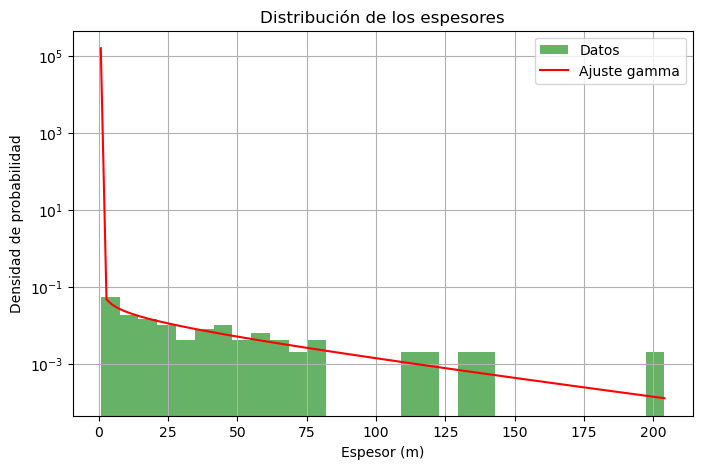

In [83]:
# Realizamos la identificacion de las distribuciones de los datos de los espesores que mejor se sjusta a los datos reales
#columnas de espesores
columnas_espesores = ["Espesor_1", "Espesor_2", "Espesor_3"]  # Asegúrate de incluir todas
todos_los_espesores = pd.concat([df[col] for col in columnas_espesores], ignore_index=True).dropna()

distribuciones = [stats.norm, stats.lognorm, stats.gamma, stats.expon, stats.weibull_min]
resultados = {}

# se realiza ajuste y evalucioan de  cada distribucion con los datos del espesor
for dist in distribuciones:
    params = dist.fit(todos_los_espesores)
    D, p_value = stats.kstest(todos_los_espesores, dist.cdf, args=params)
    
    resultados[dist.name] = {'params': params, 'KS_stat': D, 'p_value': p_value}

mejor_ajuste = sorted(resultados.items(), key=lambda x: x[1]['KS_stat'])[0]#Ordenar por mejor ajuste en estadístico KS

#vamos por los resultados del mejor ajuste
print("Mejor distribución:", mejor_ajuste[0])
print("Parámetros:", mejor_ajuste[1]['params'])
print("Estadístico KS:", mejor_ajuste[1]['KS_stat'])
print("Valor p:", mejor_ajuste[1]['p_value'])

plt.figure(figsize=(8, 5))
plt.hist(todos_los_espesores, bins=30, density=True, alpha=0.6, color='g', label="Datos")
x = np.linspace(min(todos_los_espesores), max(todos_los_espesores), 100)
pdf = mejor_ajuste[1]['params']
pdf_fitted = getattr(stats, mejor_ajuste[0]).pdf(x, *pdf)
plt.plot(x, pdf_fitted, 'r-', label=f"Ajuste {mejor_ajuste[0]}")
plt.title("Distribución de los espesores")
plt.xlabel("Espesor (m)")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.yscale('log') 
plt.grid()
plt.show()

## paso 2

Se procede a generar variaciones de modelos tomando como base la distribucion de ajuste de cada sitio de estudio, apartir de la cual se generaran variacines de espesores manteniendo la relacion de la distribucion a la cual se ajustan los valores de los modelos de c ada sitio, asi como a su desviacion estandar.

### comprobacion de Modelado de Rha de los modelos iniciales

Modelamos la risistividad aparente de los datos apartir de los espesores y la resitividad calculada de las unidades, sesimulara un VES mediante las herramientas de la libreria PiGimli, empleada en el procesamiento e inversion de datos geofisicos, para verificar que los datos apartir de los cuales se generaran las variaciones se ejecuten correctamente, 

In [84]:
#limpieza de datos, eliminamos los registros con valores nulos Nan.. previamente se verifica pero se correo porsi acaso
df = df.dropna()

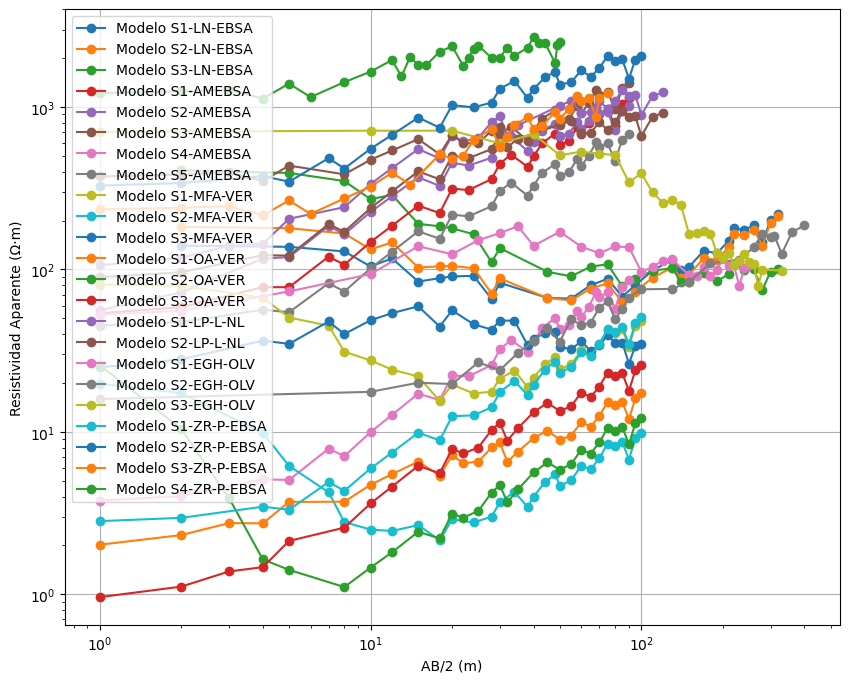

guardado 'RESULTADOS-Simulacion-Tesis-2.csv'


In [85]:

resultados = []
fig, ax = plt.subplots(figsize=(10, 8))
for _, row in df.iterrows():
    modelo_id = row["Modelo"]  
    espesores = row.filter(like="Espesor_").dropna().astype(str).replace("∞", "").astype(float).tolist()
    resistividades = row.filter(like="Resistividad_").dropna().astype(float).tolist()

    
    synthModel = espesores + resistividades# modelo sintético
  # extraemos los valores de apertura del arreglo que se empleara en la simulación
    ab2 = row.filter(like="AB2_").dropna().astype(float).values
     # se procede a generar la simulacion de la respuesta geolectrica en el subsuelo y graficamos el resultado, se agrega un nivel de ruido del 9%
 #Esta línea de código ejecuta la simulación de un sondeo eléctrico vertical (SEV) utilizando el método de resistividad aparente.
    ves = VESManager()
    rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2 / 3, noiseLevel=0.09, seed=1337)
    #La función simulate() genera una curva de resistividad aparente para el modelo synthModel, 
    # #usando un conjunto de espaciados de electrodos (ab2) y aplicando ruido para simular condiciones reales.

    for i in range(len(ab2)):
        resultados.append([modelo_id, ab2[i], rhoa[i]])

    ax.plot(ab2, rhoa, 'o-', label=f"Modelo {modelo_id}")

df_resultados = pd.DataFrame(resultados, columns=["Modelo_ID", "AB2", "Resistividad_Aparente"])
df_resultados.to_csv("RESULTADOS-Simulacion-Tesis-2.csv", index=False)


ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("AB/2 (m)")
ax.set_ylabel("Resistividad Aparente (Ω·m)")
ax.legend()
ax.grid()
plt.show()

print("guardado 'RESULTADOS-Simulacion-Tesis-2.csv'")

Parámetro	Descripción

synthModel: Lista con espesores y resistividades del modelo geológico.

ab2=ab2:   Arreglo con los valores de AB/2, que representa la distancia entre los electrodos de corriente en un SEV.

mn2=ab2 / 3:	Define la distancia entre los electrodos de potencial (MN/2), típicamente tomada como un tercio de AB/2.

noiseLevel=0.09:    Se agrega un 9% de ruido para simular la variabilidad real en los datos.

seed=1337:  Fija una semilla aleatoria para hacer que los resultados sean reproducibles.

In [86]:
df_resultados.describe()

,AB2,Resistividad_Aparente
count,690.000000,690.000000
mean,59.373913,357.078341
std,66.794592,514.765684
min,1.000000,0.961214
25%,15.000000,26.437700
50%,40.000000,106.401642
75%,75.000000,527.440070
max,400.000000,2694.696008


#### Variantes de modelos

Apartir de los resultados anteriores se busca generar variacione de registros en donde el faactor variable corresponda al espesor de la sunidades, para ello se busca que se generen estas variaciones considerando la distribucion que mas se ajusta a la dispercion general de los datos.

sin embargo es importante considerar quie las distribuciones por cada sitio difieren, efecto relacionado a la variabilidad de tipos distintos de suelo, espesores y por tanto respuesta resitiva, por lo que no seria prudente considerar todas las respuesta como parte de un  mismo conjunto de valores.

#### creacion de variaciones para cada sitio deacaurdo al mejor ajuste para cada uno

 creacion de variaciones empleando la distribucion que mejor se ajustas a los datos originales


   Sitio Mejor_Distribucion  Parametros                                        KS_stat   p_value  
0      1               norm   66.05555555555556, 47.841084182974676            0.227126  0.662627 
1      2        weibull_min   0.30435951866513944, 1.2999999999999998, 25.3... 0.264685  0.203960  
2      3               norm    15.0, 11.510864433221338                        0.330368  0.672065
3      4               norm   20.0, 18.450956012569588                         0.226881  0.663870 
4      5        weibull_min   0.5002639226424053, 0.6999999999999998, 10.30..  0.229222  0.651996 
5      6        weibull_min   0.6960698150189448, 2.3599999999999994, 27.56..  0.213594  0.897464 
6      7              gamma   0.7065440219344926, 2.999999999999999, 54.370..  0.184266  0.868458 
7      8        weibull_min   0.5799705282246079, 3.4999999999999996, 14.46..  0.120975  0.985680 

Sitio   Mejor_Distribucion
1               norm   
2        weibull_min   
3               norm    
4               norm  
5        weibull_min  
6        weibull_min   
7              gamma   
8        weibull_min  

In [ ]:
from scipy.stats import weibull_min, gamma

# Definir la mejor distribución por sitio
distribuciones_por_sitio = {
    1: "norm", 2: "weibull_min", 3: "norm", 4: "norm",
    5: "weibull_min", 6: "weibull_min", 7: "gamma", 8: "weibull_min"
}

# Lista para almacenar las nuevas filas
nuevas_filas = []

# Definir columnas de espesores
espesor_cols = ["Espesor_1", "Espesor_2", "Espesor_3"]  # Ajusta según sea necesario
num_variantes = 100  # Cantidad de variaciones por modelo

# Iterar sobre cada fila del DataFrame
for _, row in df.iterrows():
    modelo_base = row["Modelo"]
    sitio_id = row["Sitio"]
    suma_espesores = row[espesor_cols].sum()
    distribucion = distribuciones_por_sitio.get(sitio_id, "norm")

    for i in range(1, num_variantes + 1):
        # Generar espesores según la mejor distribución por sitio
        if distribucion == "norm":
            nuevos_espesores = np.abs(np.random.normal(loc=suma_espesores/len(espesor_cols), scale=1, size=len(espesor_cols)))
        elif distribucion == "weibull_min":
            nuevos_espesores = weibull_min.rvs(2.0, loc=0, scale=5.0, size=len(espesor_cols))
        elif distribucion == "gamma":
            nuevos_espesores = gamma.rvs(a=2.0, scale=suma_espesores/len(espesor_cols), size=len(espesor_cols))
        else:
            nuevos_espesores = np.abs(np.random.normal(loc=suma_espesores/len(espesor_cols), scale=1, size=len(espesor_cols)))
        
        # Asegurar que la suma no sea cero antes de normalizar
        if np.sum(nuevos_espesores) == 0:
            nuevos_espesores += 1e-6  # Pequeño ajuste para evitar división por cero
        
        # Normalizar para que sumen "suma_espesores"
        nuevos_espesores = (nuevos_espesores / np.sum(nuevos_espesores)) * suma_espesores
        
        # Crear una nueva fila con los valores generados
        nueva_fila = row.copy()
        nueva_fila[espesor_cols] = nuevos_espesores
        nueva_fila["Modelo"] = f"{modelo_base}_V{i}"
        nueva_fila["Sitio"] = sitio_id
        nuevas_filas.append(nueva_fila)

# Convertir a DataFrame
df_variantes = pd.DataFrame(nuevas_filas)

# Exportar a CSV
output_path = "modelos_sinteticos_variaciones.csv"
df_variantes.to_csv(output_path, index=False)

# Vista previa
print(df_variantes.describe())

             Sitio    Espesor_1    Espesor_2    Espesor_3  Resistividad_1  \
count  2300.000000  2300.000000  2300.000000  2300.000000     2300.000000   
mean      4.565217    31.759898    31.678567    31.229361      193.690435   
std       2.482231    24.141270    24.916262    24.068190      297.108693   
min       1.000000     0.375188     0.451961     1.387847        1.000000   
25%       2.000000    17.487164    16.869275    16.908809       21.800000   
50%       5.000000    22.006161    21.624098    21.578157       56.600000   
75%       7.000000    38.031451    38.131449    37.130726      250.000000   
max       8.000000   176.152808   185.068724   161.771906     1300.000000   

       Resistividad_2  Resistividad_3  Resistividad_4        AB2_1  \
count     2300.000000     2300.000000     2300.000000  2300.000000   
mean       562.189565     1748.241739     2222.542261     1.130435   
std        872.979323     2434.853206     2980.441118     0.336854   
min          1.000000     

In [65]:
from scipy.stats import norm, weibull_min, gamma

# Diccionario con la mejor distribución por sitio
distribuciones_por_sitio = {
    1: norm, 2: weibull_min, 3: norm, 4: norm, 5: weibull_min,
    6: weibull_min, 7: gamma, 8: weibull_min
}

# Parámetros generales de las distribuciones (ajusta según sea necesario)
parametros_distribucion = {
    "norm": {"loc": 5, "scale": 2},  # Media y desviación estándar
    "weibull_min": {"c": 2.0, "scale": 5.0},  # Forma y escala
    "gamma": {"a": 2.0, "scale": 3.0}  # Forma y escala
}

# Lista para almacenar las nuevas filas
nuevas_filas = []

# Definir columnas de espesores
espesor_cols = ["Espesor_1", "Espesor_2", "Espesor_3"]  # Ajusta según sea necesario
num_variantes = 100  # Cantidad de variaciones por modelo

# Iterar sobre cada fila del DataFrame
for _, row in df.iterrows():
    modelo_base = row["Modelo"]
    sitio_id = row["Sitio"]  # Obtener el número de sitio
    suma_espesores = row[espesor_cols].sum()
    
    # Obtener la mejor distribución para el sitio
    distribucion = distribuciones_por_sitio.get(sitio_id, norm)  # Por defecto usa normal
    params = parametros_distribucion.get(distribucion.name, {"loc": 5, "scale": 2})

    for i in range(1, num_variantes + 1): # Generar espesores con la distribución correspondiente
        if distribucion == norm:
            espesores_generados = distribucion.rvs(loc=params["loc"], scale=params["scale"], size=len(espesor_cols))
        elif distribucion == weibull_min:
            espesores_generados = distribucion.rvs(params["c"], scale=params["scale"], size=len(espesor_cols))
        elif distribucion == gamma:
            espesores_generados = distribucion.rvs(params["a"], scale=params["scale"], size=len(espesor_cols))

        # Normalizar para que sumen "suma_espesores"
        nuevos_espesores = (espesores_generados / np.sum(espesores_generados)) * suma_espesores
        
        # Crear una nueva fila con los valores generados
        nueva_fila = row.copy()
        nueva_fila[espesor_cols] = nuevos_espesores
        nueva_fila["Modelo"] = f"{modelo_base}_V{i}"
        nueva_fila["Sitio"] = sitio_id  # Agregar el número de sitio
        nuevas_filas.append(nueva_fila)

# Convertir a DataFrame
df_variantes = pd.DataFrame(nuevas_filas)

# Exportar a CSV
output_path = "modelos_sinteticos_variaciones.csv"
df_variantes.to_csv(output_path, index=False)

# Vista previa
print(df_variantes.head())


          Modelo  Sitio  Espesor_1  Espesor_2  Espesor_3  Resistividad_1  \
0  S1-LN-EBSA_V1      1  37.356740  73.455001  87.288259           150.0   
0  S1-LN-EBSA_V2      1  49.763515  89.325166  59.011319           150.0   
0  S1-LN-EBSA_V3      1  91.941615  72.401804  33.756581           150.0   
0  S1-LN-EBSA_V4      1  49.603778  75.736800  72.759422           150.0   
0  S1-LN-EBSA_V5      1  47.087993  57.697016  93.314990           150.0   

   Resistividad_2  Resistividad_3  Resistividad_4  AB2_1  ...  AB2_21  AB2_22  \
0            60.0           804.5           965.4      2  ...     150     170   
0            60.0           804.5           965.4      2  ...     150     170   
0            60.0           804.5           965.4      2  ...     150     170   
0            60.0           804.5           965.4      2  ...     150     170   
0            60.0           804.5           965.4      2  ...     150     170   

   AB2_23  AB2_24  AB2_25  AB2_26  AB2_27  AB2_28  AB2_2

In [88]:
df_variantes.describe()

,Sitio,Espesor_1,Espesor_2,Espesor_3,Resistividad_1,Resistividad_2,Resistividad_3,Resistividad_4,AB2_1,AB2_2,...,AB2_21,AB2_22,AB2_23,AB2_24,AB2_25,AB2_26,AB2_27,AB2_28,AB2_29,AB2_30
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,4.565217,31.759898,31.678567,31.229361,193.690435,562.189565,1748.241739,2222.542261,1.130435,3.086957,...,81.434783,89.565217,98.000000,106.173913,112.521739,119.652174,127.086957,135.043478,143.652174,154.565217
std,2.482231,24.141270,24.916262,24.068190,297.108693,872.979323,2434.853206,2980.441118,0.336854,2.357981,...,48.037453,53.719282,61.803404,68.050369,71.499121,77.302617,81.693639,87.042898,93.456933,103.556935
min,1.000000,0.375188,0.451961,1.387847,1.000000,1.000000,32.500000,39.000000,1.000000,2.000000,...,30.000000,32.000000,34.000000,38.000000,40.000000,42.000000,44.000000,48.000000,49.000000,50.000000
25%,2.000000,17.487164,16.869275,16.908809,21.800000,20.000000,85.000000,102.000000,1.000000,2.000000,...,54.000000,58.000000,60.000000,64.000000,68.000000,70.000000,75.000000,80.000000,85.000000,90.000000
50%,5.000000,22.006161,21.624098,21.578157,56.600000,90.000000,1013.700000,1216.440000,1.000000,2.000000,...,55.000000,60.000000,65.000000,70.000000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000
75%,7.000000,38.031451,38.131449,37.130726,250.000000,690.160000,2300.000000,3120.000000,1.000000,2.000000,...,150.000000,170.000000,180.000000,190.000000,200.000000,210.000000,220.000000,230.000000,240.000000,250.000000
max,8.000000,176.152808,185.068724,161.771906,1300.000000,3200.000000,11000.000000,13200.000000,2.000000,10.000000,...,200.000000,210.000000,230.000000,260.000000,280.000000,300.000000,310.000000,330.000000,360.000000,400.000000


In [89]:
df.describe()

,Sitio,Espesor_1,Espesor_2,Espesor_3,Resistividad_1,Resistividad_2,Resistividad_3,Resistividad_4,AB2_1,AB2_2,...,AB2_21,AB2_22,AB2_23,AB2_24,AB2_25,AB2_26,AB2_27,AB2_28,AB2_29,AB2_30
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,4.565217,5.337391,22.094348,67.236087,193.690435,562.189565,1748.241739,2222.542261,1.130435,3.086957,...,81.434783,89.565217,98.000000,106.173913,112.521739,119.652174,127.086957,135.043478,143.652174,154.565217
std,2.537466,7.897271,20.635589,45.085015,303.720079,892.405221,2489.034570,3046.763130,0.344350,2.410452,...,49.106402,54.914666,63.178679,69.564654,73.090150,79.022787,83.511520,88.979813,95.536575,105.861327
min,1.000000,0.700000,4.500000,20.000000,1.000000,1.000000,32.500000,39.000000,1.000000,2.000000,...,30.000000,32.000000,34.000000,38.000000,40.000000,42.000000,44.000000,48.000000,49.000000,50.000000
25%,2.000000,2.180000,8.750000,41.800000,23.950000,32.500000,85.000000,111.000000,1.000000,2.000000,...,54.000000,58.000000,60.000000,64.000000,68.000000,70.000000,75.000000,80.000000,85.000000,90.000000
50%,5.000000,3.000000,15.700000,52.700000,56.600000,90.000000,1013.700000,1216.440000,1.000000,2.000000,...,55.000000,60.000000,65.000000,70.000000,75.000000,80.000000,85.000000,90.000000,95.000000,100.000000
75%,7.000000,5.800000,24.000000,73.000000,223.005000,575.080000,2150.000000,2940.000000,1.000000,2.000000,...,107.500000,120.000000,127.500000,135.000000,142.500000,150.000000,157.500000,165.000000,175.000000,185.000000
max,8.000000,40.000000,78.470000,204.000000,1300.000000,3200.000000,11000.000000,13200.000000,2.000000,10.000000,...,200.000000,210.000000,230.000000,260.000000,280.000000,300.000000,310.000000,330.000000,360.000000,400.000000


## paso 3 

Una ves generadas las variaciones de modelos se generan registros independientes para cada sitio, de manera que obtengamos valores de resitividad mediante PyGIMLI para cada sitio,


In [90]:

# Eliminamos registros con valores nulos para que se pueda realizar la simulacion mediante PyGIMLi
df2 = df_variantes.dropna()

# definimos la lista de guardado de los resultados
resultados2 = []
resistividades_aparentes = []

for _, row in df2.iterrows():
    modelo_id = row["Modelo"]  # Nombre del modelo
    sitio_id = row["Sitio"]  # Sitio correspondiente
    

    # Extraemos espesores y resistividades
    espesores = row.filter(like="Espesor_").dropna().astype(str).replace("∞", "").astype(float).tolist()
    resistividades = row.filter(like="Resistividad_").dropna().astype(float).tolist()
    synthModel = espesores + resistividades

    # Extraemos los valores de apertura AB2
    ab2 = row.filter(like="AB2_").dropna().astype(float).values

  #simulacion emplando la libreria de PyGIMLi para la simulacion de sondeos electricos verticales
    ves = VESManager()
    rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2 / 3, noiseLevel=0.09, seed=1337)

    #guardado de resultados en una lista
    for i in range(len(ab2)):
        resultados2.append([modelo_id, sitio_id, ab2[i], rhoa[i]])
        resistividades_aparentes.append(rhoa[i])

# Guardar los resultados en un archivo CSV
csv_output_path = "RESULTADOS-Simulacion-Tesis-2.csv"
df_resultados2 = pd.DataFrame(resultados2, columns=["Modelo_ID", "Sitio_ID", "AB2", "Resistividad_Aparente"])
df_resultados2.to_csv(csv_output_path, index=False)

# Vista previa
print(df_resultados2.head())



       Modelo_ID  Sitio_ID   AB2  Resistividad_Aparente
0  S1-LN-EBSA_V1         1   2.0             140.506709
1  S1-LN-EBSA_V1         1   5.0             143.377019
2  S1-LN-EBSA_V1         1   8.0             145.638239
3  S1-LN-EBSA_V1         1  10.0             126.277316
4  S1-LN-EBSA_V1         1  12.0             152.729411


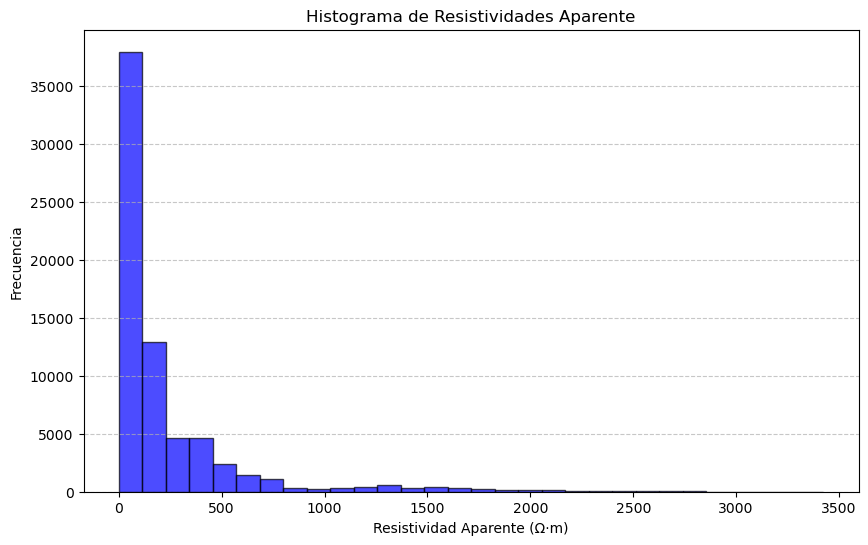

In [91]:
# Crear el histograma de resistividades aparentes
plt.figure(figsize=(10, 6))
plt.hist(resistividades_aparentes, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel("Resistividad Aparente (Ω·m)")
plt.ylabel("Frecuencia")
plt.title("Histograma de Resistividades Aparente")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el histograma
plt.show()

## paso 4

Con este conjunto de datos se procede a realizar el entrenamiento y comprobacion de cada sitio empleando los valores de adquisicion reales


MAE (Error Absoluto Medio): 36.56
R² (Coeficiente de determinación): 0.31


c:\Users\juanj\.conda\envs\pg\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


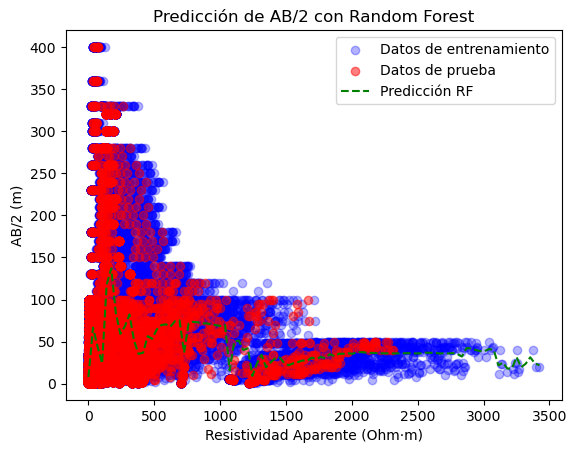

In [92]:
#datos de entrada
#df = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")  

df = pd.read_csv("RESULTADOS-Simulacion-Tesis-2.csv")  

df["Modelo_ID"] = df["Modelo_ID"].astype("category")
df["AB2"] = df["AB2"].astype(np.float32)
df["Resistividad_Aparente"] = df["Resistividad_Aparente"].astype(np.float32)

# LA VARIABLE DE ENTRADA ES LA RESISTIVIDAD APARENTE mientras que la variable objetivo es AB/2
X = df[['Resistividad_Aparente']]  
y = df['AB2'] 
groups = df["Modelo_ID"]

# dividimos por grupos para entrenamiento y prueba
gss = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups))

X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# modelo de entrenamiento, consideramos 500 arboles y una profundidad de 10 y na semilla de 42 y comparacmos con variacione de ramas y max_depth
rf_inverse = RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1, random_state=42)
rf_inverse.fit(X_train, y_train)

#evalucion delk modelo empoleado el error absoluto medio y el coeficiente de determinacion
y_pred = rf_inverse.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE (Error Absoluto Medio): {mae:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")


X_pred = np.linspace(min(X_train['Resistividad_Aparente']), max(X_train['Resistividad_Aparente']), 100).reshape(-1, 1)
y_predicted = rf_inverse.predict(X_pred)

plt.scatter(X_train, y_train, label="Datos de entrenamiento", color="blue", alpha=0.3)
plt.scatter(X_test, y_test, label="Datos de prueba", color="red", alpha=0.5)
plt.plot(X_pred, y_predicted, label="Predicción RF", color="green", linestyle="dashed")
plt.xlabel("Resistividad Aparente (Ohm·m)")
plt.ylabel("AB/2 (m)")
plt.title("Predicción de AB/2 con Random Forest")
plt.legend()
plt.show()


In [101]:
# 🔹 Cargar nuevos datos de resistividad para predicción
nuevos_datos = pd.read_csv("nuevos_datos_prediccion.csv")  # Asegúrate del nombre correcto

# 🔹 Verificar que las columnas sean correctas
print(nuevos_datos.head())  # Debe tener la columna "Resistividad_Aparente"

# 🔹 Asegurar que el tipo de datos sea correcto
nuevos_datos["Resistividad_Aparente"] = nuevos_datos["Resistividad_Aparente"].astype(np.float32)

# 🔹 Usar el modelo inverso para predecir AB/2
ab2_predicho = rf_inverse.predict(nuevos_datos[["Resistividad_Aparente"]])

# 🔹 Agregar los resultados al DataFrame
nuevos_datos["AB2_Predicho"] = ab2_predicho

# 🔹 Guardar los resultados en un nuevo archivo CSV
nuevos_datos.to_csv("predicciones_AB2.csv", index=False)

# 🔹 Mostrar resultados
print(nuevos_datos.head(30))

    Modelo_ID  AB2  Resistividad_Aparente
0  SEV-Prueva  2.0                  278.7
1  SEV-Prueva  5.0                  392.9
2  SEV-Prueva  NaN                    NaN
3  SEV-Prueva  NaN                    NaN
4  SEV-Prueva  NaN                    NaN
     Modelo_ID    AB2  Resistividad_Aparente  AB2_Predicho
0   SEV-Prueva    2.0             278.700012     68.359440
1   SEV-Prueva    5.0             392.899994     44.111371
2   SEV-Prueva    NaN                    NaN     43.749418
3   SEV-Prueva    NaN                    NaN     43.749418
4   SEV-Prueva    NaN                    NaN     43.749418
5   SEV-Prueva   10.0             596.900024     70.235875
6   SEV-Prueva   10.0             577.799988     70.637862
7   SEV-Prueva   15.0             999.099976     69.633917
8   SEV-Prueva   20.0            1147.800049     53.036006
9   SEV-Prueva    NaN                    NaN     43.749418
10  SEV-Prueva   30.0            1281.800049     24.834746
11  SEV-Prueva   40.0            1298.00

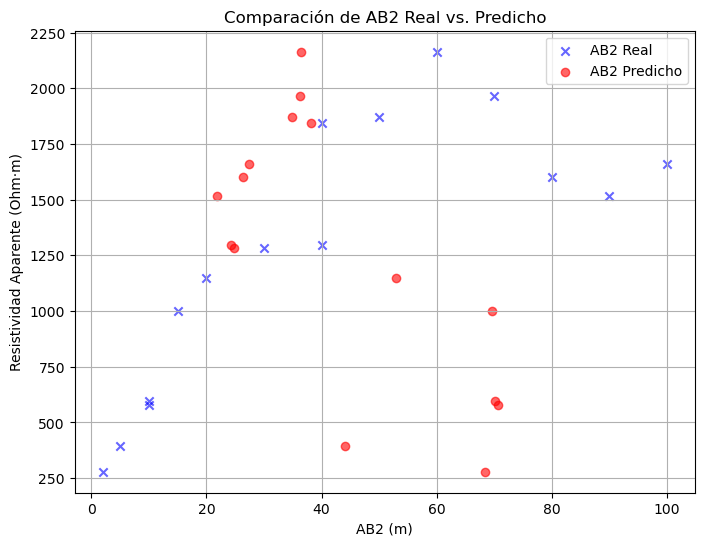

In [96]:
# 🔹 Cargar el archivo con predicciones
archivo_predicciones = "predicciones_AB2.csv"  # Asegúrate del nombre correcto
df_pred = pd.read_csv(archivo_predicciones)

# 🔹 Crear la figura
plt.figure(figsize=(8, 6))

# 🔹 Scatter de los valores reales de AB2
plt.scatter(df_pred["AB2"], df_pred["Resistividad_Aparente"], 
            label="AB2 Real", color="blue", alpha=0.6, marker="x")

# 🔹 Scatter de los valores predichos de AB2
plt.scatter(df_pred["AB2_Predicho"], df_pred["Resistividad_Aparente"], 
            label="AB2 Predicho", color="red", alpha=0.6, marker="o")

# 🔹 Configuración del gráfico
plt.ylabel("Resistividad Aparente (Ohm·m)")
plt.xlabel("AB2 (m)")
plt.title("Comparación de AB2 Real vs. Predicho")
plt.legend()
plt.grid(True)
plt.show()

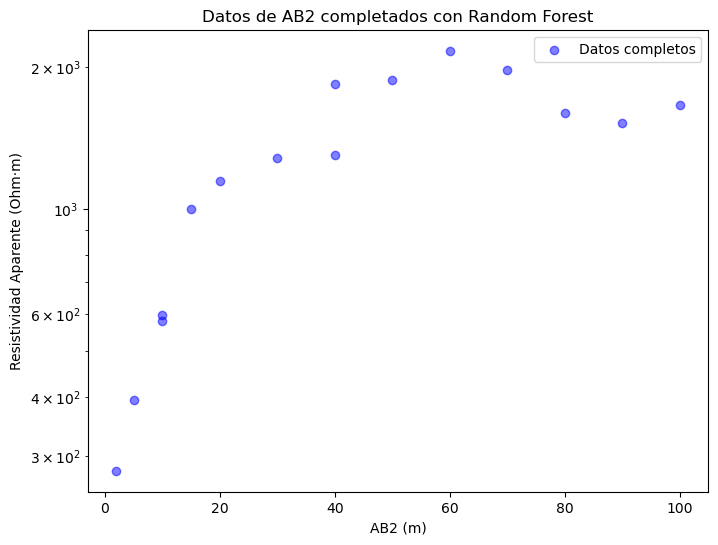

In [ ]:

df_train = pd.read_csv("Simulacion-Rha-sintetica-Tesina-MCD-.csv")

df_train["Modelo_ID"] = df_train["Modelo_ID"].astype("category")
df_train["AB2"] = df_train["AB2"].astype(np.float32)
df_train["Resistividad_Aparente"] = df_train["Resistividad_Aparente"].astype(np.float32)

X_train = df_train[['Resistividad_Aparente']]
y_train = df_train['AB2']

rf_model = RandomForestRegressor(n_estimators=500, max_depth=10, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

df_nuevo = pd.read_csv("nuevos_datos_prediccion.csv")  # Reemplaza con el archivo correcto

df_nuevo["Modelo_ID"] = df_nuevo["Modelo_ID"].astype("category")
df_nuevo["Resistividad_Aparente"] = df_nuevo["Resistividad_Aparente"].astype(np.float32)

df_faltantes = df_nuevo[df_nuevo["AB2"].isna()]
if not df_faltantes.empty:
    X_pred = df_faltantes[['Resistividad_Aparente']]
    y_pred = rf_model.predict(X_pred)
    df_nuevo.loc[df_nuevo["AB2"].isna(), "AB2"] = y_pred


df_nuevo.to_csv("datos_completados.csv", index=False)


plt.figure(figsize=(8, 6))
plt.scatter(df_nuevo['AB2'], df_nuevo['Resistividad_Aparente'], label="Datos completos", color="blue", alpha=0.5)
plt.xlabel("AB2 (m)")
plt.ylabel("Resistividad Aparente (Ohm·m)")
plt.yscale("log")  # Eje Y en escala logarítmica
plt.title("Datos de AB2 completados con Random Forest")
plt.legend()
plt.show()
